In [299]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sys
import itertools

In [300]:
#import data set
data = load_boston()

In [301]:
boston_data = pd.DataFrame(data.data)


In [302]:
boston_data.describe() # no missing values

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [303]:
boston_data.columns = data.feature_names
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [304]:
boston_data['price'] = data.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [317]:
reg = linear_model.LinearRegression()
features = [col for col in boston_data.columns if not col == 'price' ]
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [259]:
X = boston_data[features].to_numpy()
X = std_scaler.fit_transform(X)
reg.fit(X,boston_data.price)
np.shape(X)

(506, 13)

In [260]:
reg_betas = []
reg_betas.append(reg.intercept_)
reg_betas.extend(reg.coef_)
reg_betas


[22.532806324110677,
 -0.9281460643011966,
 1.0815686278223822,
 0.14089999690428612,
 0.6817397247777939,
 -2.0567182660052157,
 2.674230165239318,
 0.01946607165704728,
 -3.104044258086441,
 2.662217642473626,
 -2.0767816838433766,
 -2.0606066589067593,
 0.8492684177053297,
 -3.7436271264671093]

In [261]:
reg.intercept_

22.532806324110677

In [262]:
# get r^2 score for the model
r2_score(boston_data.price,reg.predict(X))

0.7406426641094095

In [263]:
# Get a summary of the model using OLS from statsmodels
std_scaler = preprocessing.StandardScaler()

#X  = sm.add_constant(X)
y = boston_data.price
model = sm.OLS(y,sm.add_constant(X))
results=model.fit()
np.shape(X)

(506, 13)

In [264]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 07 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        01:50:20   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.000      22.118      22.947
x1            -0.9281      0.282     -3.287      0.001      -1.483      -0.373
x2             1.0816      0.320      3.382      0.001       0.453       1.710
x3             0.1409      0.421      0.334      0.738      -0.687       0.969
x4             0.6817      0.219      3.118      0.002       0.252       1.111
x5            -2.0567      0.442     -4.651      0.000      -2.926      -1.188
x6             2.6742      0.293      9.116      0.000       2.098       3.251
x7             0.0195      0.371      0.052      0.958      -0.710       0.749
x8            -3.1040      0.420     -7.398      0.000      -3.928      -2.280
x9             2.6622      0.577      4.613      0.000       1.528       3.796
x10           -2.0768      0.633     -3.280      0.001      -3.321      -0.833
x11           -2.0606      0.283     -7.283      0.000      -2.617      -1.505
x12            0.8493      0.245      3.467      0.001       0.368       1.331
x13           -3.7436      0.362    -10.347      0.000      -4.454      -3.033
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## personal class representing multiple linear regression


In [265]:
class MultipleLinearRegression:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.n = np.size(self.y)
        self.beta = self.normalEq()
        self.y_mean = (sum(y)/self.n)*np.ones(np.shape(self.y))
        
    def normalEq (self):
        return (np.linalg.inv(self.X.T@self.X)@self.X.T@self.y)
    def getbeta (self):
        return self.beta
    def predict (self,X,b):
        return X@self.beta
    def getSSR (self,b):
        return (self.predict(self.X,b)-self.y_mean).T@(self.predict(self.X,b)-self.y_mean)
    def getSST (self):
        return (self.y-self.y_mean).T@(self.y-self.y_mean)
    def getRSquared (self,b):
        return self.getSSR(b)/self.getSST()
   

In [266]:
my_model = MultipleLinearRegression(sm.add_constant(X),y)
np.shape(X)

(506, 13)

In [267]:
my_model.getbeta()

array([ 2.25328063e+01, -9.28146064e-01,  1.08156863e+00,  1.40899997e-01,
        6.81739725e-01, -2.05671827e+00,  2.67423017e+00,  1.94660717e-02,
       -3.10404426e+00,  2.66221764e+00, -2.07678168e+00, -2.06060666e+00,
        8.49268418e-01, -3.74362713e+00])

In [268]:
my_model.getRSquared(my_model.beta)


0.7406426641094074

## gradient descent function

In [269]:
def gradient_descent(X,y,learning_rate=0.1,tol = 0.000000001,stop_cond = "norm_beta"):
    X = sm.add_constant(X)
    (n,p) = np.shape(X)
    beta = np.random.uniform(-10.0, 10.0, p)
    last_beta = beta.copy()
    num_iteration = 0
    
    while(True):
        errors = np.subtract(X.dot(beta),y)
        grad = (X.T.dot(errors))
        beta -= (learning_rate/n)*grad
        num_iteration+=1
        if stop_cond == 'norm_beta':
            if (np.linalg.norm(last_beta-beta)<=tol):
                break
        if stop_cond == 'norm_grad':
            if (np.linalg.norm(grad)<=tol):
                break
        if stop_cond == 'cost':
            if (cost(X,y,last_beta)-cost(X,y,beta)<=tol):
                break
        last_beta= beta.copy()
        
    return (beta,num_iteration)    

## Compare between different stopping condition

In [270]:
(estimated_beta_cost,num_iteration_cost)=gradient_descent(X,y, stop_cond='cost')
np.shape(X)
print ("Cost stop condition")
print(estimated_beta_cost)
print(num_iteration_cost,'\n')
(estimated_beta_grad,num_iteration_grad)=gradient_descent(X,y, stop_cond='norm_grad')
np.shape(X)
print ("gradient stop condition")
print(estimated_beta_grad)
print(num_iteration_grad,'\n')

(estimated_beta_diffBeta,num_iteration_diffBeta)=gradient_descent(X,y, stop_cond='norm_beta')
np.shape(X)
print ("diffBeta stop condition")
print(estimated_beta_diffBeta)
print(num_iteration_diffBeta,'\n')


Cost stop condition
[ 2.25328063e+01 -9.28095335e-01  1.08147935e+00  1.40623117e-01
  6.81779327e-01 -2.05666964e+00  2.67428050e+00  1.94234566e-02
 -3.10406413e+00  2.66151912e+00 -2.07598773e+00 -2.06058073e+00
  8.49263523e-01 -3.74360017e+00]
963 

gradient stop condition
[ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]
4081 

diffBeta stop condition
[ 2.25328063e+01 -9.28146071e-01  1.08156864e+00  1.40900036e-01
  6.81739719e-01 -2.05671827e+00  2.67423016e+00  1.94660777e-02
 -3.10404426e+00  2.66221774e+00 -2.07678180e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]
2460 



## compare between coef from gradient descent and sklearn model 

In [271]:
print ("cost stop condition") 
print(estimated_beta_cost-reg_betas)
print("gradient stop condition")
print(estimated_beta_grad - reg_betas)
print ('diff beta stop condition')
print(estimated_beta_diffBeta - reg_betas)

cost stop condition
[-2.13162821e-14  5.07293325e-05 -8.92817661e-05 -2.76879614e-04
  3.96019460e-05  4.86306827e-05  5.03381785e-05 -4.26150333e-05
 -1.98706430e-05 -6.98527419e-04  7.93957509e-04  2.59250868e-05
 -4.89428724e-06  2.69565385e-05]
gradient stop condition
[-2.13162821e-14  1.41042733e-12 -2.48578935e-12 -7.71804842e-12
  1.10467191e-12  1.33892897e-12  1.40021328e-12 -1.18572513e-12
 -5.61328761e-13 -1.94675387e-11  2.21285212e-11  7.18092252e-13
 -1.35003120e-13  7.47402140e-13]
diff beta stop condition
[-2.13162821e-14 -7.15481752e-09  1.25991588e-08  3.90928451e-08
 -5.59304325e-09 -6.79330237e-09 -7.09483894e-09  6.00237567e-09
  2.84910051e-09  9.86349300e-08 -1.12141012e-07 -3.64309960e-09
  6.94906799e-10 -3.80403886e-09]


In [272]:
n = np.size(y)
y_mean = (sum(y)/n)*np.ones(np.shape(y))
def predict (X,beta):
        return X@beta
def getSSR (X,y,beta):
        return (predict(X,beta)-y_mean).T@(predict(X,beta)-y_mean)
def getSST (X,y,beta):
        return (y-y_mean).T@(y-y_mean)
def getRSquared (X,y,beta):
        return getSSR(X,y,beta)/getSST(X,y,beta)

In [273]:
getRSquared(sm.add_constant(X),y,estimated_beta_grad)

0.7406426641092532

In [274]:
def cost(X, Y, beta):
  return ((Y - (X @ beta))**2).mean()

## standralization of X and calc R^2 using beta estimated from gradient descent

In [275]:

getRSquared(sm.add_constant(X),y,estimated_beta_grad)

0.7406426641092532

## Plot learning Curves of Model

In [276]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state= 42)
        
    train_errors , val_errors = [],[]
    for i in range (1,len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        y_train_predict= model.predict(X_train[:i])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:i],y_train_predict))
        val_errors.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(np.sqrt(train_errors),  label = 'train')
    plt.plot(np.sqrt(val_errors), label = "test")

(506, 13)

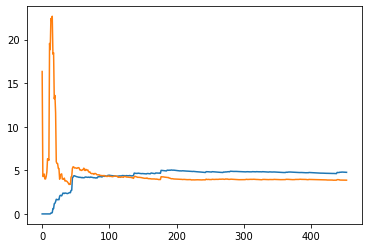

In [277]:
plot_learning_curves(reg,X,y)
np.shape(X)

## use cross validation to tune lambda parameter for ridge regression

In [278]:
def get_alpha (X,y):
    cv = KFold(n_splits= 10)
    parameters = np.arange(0,200,0.1)
    alpha = 0
    max_score = sys.maxsize*-1
    for par in parameters:
        ridge = linear_model.Ridge(alpha = par )
        tot_score = 0
        for X_train_idx,X_test_idx in cv.split(X):
            X_train = X[X_train_idx]
            y_train = y[X_train_idx]
            X_test =X[X_test_idx]
            y_test = y[X_test_idx]
            ridge.fit(X_train, y_train)
            tot_score += r2_score(y_test,ridge.predict(X_test))
         
        tot_score/=10
        
        
        if tot_score > max_score:
            alpha = par
            max_score = tot_score
    return alpha        

In [279]:
alpha = get_alpha(X,y)
alpha

112.30000000000001

In [217]:
ridge = linear_model.Ridge(alpha = alpha)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)
linear_reg = linear_model.LinearRegression()
ridge.fit(X_train,y_train)
linear_reg.fit(X_train,y_train)
(n,p) = np.shape(X_test)
r_score=r2_score(y_test,ridge.predict(X_test))
l_score=r2_score(y_test,linear_reg.predict(X_test))
adj_r_score = adjusted_R(r_score,n,p)
adj_l_score = adjusted_R(l_score,n,p)
print ("r^2 score for linear regression",l_score)
print("r^2 score for ridge regression",r_score)
print ("adj r^2 score for linear regression",adj_l_score)
print("adj r^2 score for ridge regression",adj_r_score)

r^2 score for linear regression 0.7598135533532475
r^2 score for ridge regression 0.76588622025535
adj r^2 score for linear regression 0.6754237207476317
adj r^2 score for ridge regression 0.6836300273720946


(506, 13)

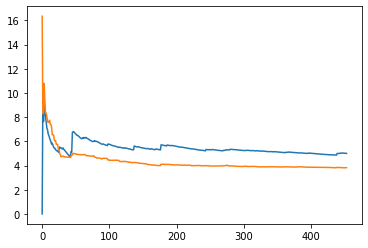

In [206]:
plot_learning_curves(ridge,X,y)
np.shape(X)

## Compare between Coefficients before and after ridge regression

In [207]:
## get coef with ridge regression
ridge_beta = []
ridge_beta.append(ridge.intercept_)
ridge_beta.extend(ridge.coef_)
print("Coef fot linear Regression: " ,reg_betas)
print("Coef for ridge Regression: " ,ridge_beta)
print("Difference: ",abs(np.subtract(reg_betas,ridge_beta)))

Coef fot linear Regression:  [22.532806324110677, -0.9281460643011966, 1.0815686278223822, 0.14089999690428612, 0.6817397247777939, -2.0567182660052157, 2.674230165239318, 0.01946607165704728, -3.104044258086441, 2.662217642473626, -2.0767816838433766, -2.0606066589067593, 0.8492684177053297, -3.7436271264671093]
Coef for ridge Regression:  [22.595978892367725, -0.6986156689129943, 0.3961486934815475, -0.42220901819230866, 0.754213784582829, -0.8878258445247157, 2.7191615403286726, -0.11395992884410798, -1.5465144334524263, 0.5732995723447495, -0.5211029589664686, -1.5930461028176979, 0.8116067742021732, -2.9608509287975995]
Difference:  [0.06317257 0.2295304  0.68541993 0.56310902 0.07247406 1.16889242
 0.04493138 0.133426   1.55752982 2.08891807 1.55567872 0.46756056
 0.03766164 0.7827762 ]


## feature selection

In [227]:
def adjusted_R (r2 , n, p):
    return 1-((n-1)*(1-r2)/(n-p-1))

r = np.ones((np.size(y),1))
my_model = MultipleLinearRegression(r,y)
my_model.getRSquared(my_model.getbeta())
step_features = []
step_features.append([])
step_features

[[]]

In [306]:
def forward_step_wise (features,data,y):
    lin_reg = linear_model.LinearRegression()
    step_features = []
    step_features.append([])
    curr_features = step_features[0].copy()
    p = np.size(features)
    for i in range (1,p+1):
        taken_feature = ''
        max_score = sys.maxsize *-1
        for feature in features:
            trial_features = curr_features.copy()
            trial_features.append(feature)
            
            lin_reg.fit(data[trial_features],y)
            model_score = lin_reg.score(data[trial_features],y)
            if model_score > max_score:
                max_score = model_score
                taken_feature = feature
        curr_features.append(taken_feature)
        step_features.append(curr_features.copy())
        features.remove(taken_feature)
    return step_features    

In [316]:
feature_selections_models = forward_step_wise(features.copy(),boston_data,boston_data.price)

feature_selections_models
features

[]

In [322]:
def select_features(features,data,y):
    m_features = forward_step_wise(features.copy(),data,y)
    
    train_test_split
    max_score = 0
    selected_features= []
    for i in range(1,len(m_features)):
        n = np.size(y)
        p = i
        curr_features = m_features[i].copy()
        X = data[curr_features]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        lin_model = linear_model.LinearRegression()
        lin_model.fit(X_train,y_train)
        curr_score = lin_model.score(X_test,y_test)
       # curr_adj_score=ad(curr_score,n,p)
        if (curr_score>max_score):
            max_score = curr_score
            selected_features = curr_features.copy()
    return selected_features       

In [323]:
select_features(features,boston_data,boston_data.price)


['LSTAT',
 'RM',
 'PTRATIO',
 'DIS',
 'NOX',
 'CHAS',
 'B',
 'ZN',
 'CRIM',
 'RAD',
 'TAX']